****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
#df1 = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#df2 = pd.read_csv('5_minutes_WDO_2018-08-31_2018-08-31.csv')
#df3 = pd.read_csv('WDO_2018-09-03_2018-09-28.csv')

#frames = [df1, df2, df3]
#result = pd.concat(frames)

#data_frame = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#data_frame = pd.read_csv('DOL_2018-08-01_2018-08-31.csv')
#data_frame = pd.read_csv('3_min_ITUB4_2018-09-03_2018-09-28.csv')
data_frame = pd.read_csv('PETR4_2018-09-03_2018-09-28.csv')
#data_frame = pd.read_csv('PETR4_2018-07-02_2019-01-24.csv')
#data_frame = pd.read_csv('WDO_2018-07-02_2018-09-28.csv')
#data_frame = result

In [3]:
data_frame.count()

Start                        2311
End                          2311
NegociatedOffersAmount       2311
TotalTradedQuantity          2311
RSIIndicator                 2311
SMAIndicatorDiff             2311
EMAIndicatorDiff             2311
UpperBollingerBand           2311
LowerBollingerBand           2311
MiddleBollingerBand          2311
MACD                         2311
AroonUpIndicator             2311
AroonDownIndicator           2311
AroonIndicator               2311
PlusDirectionalIndicator     2311
MinusDirectionalIndicator    2311
ADXIndicator                 2311
CCI                          2311
CMO                          2311
ROC                          2311
BuySignal                    2311
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.5750757247944612

In [ ]:
#data_frame["TotalTradedQuantity"].head()
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal
0,03/09/2018 11:25:00,03/09/2018 11:28:00,182,188600,0.280000,-0.022143,0.007360,0.096223,-0.051938,0.022143,...,14.285714,100.000000,-85.714286,13.408343,22.869885,0.000000,-39.853716,-63.265306,0.000000,0
1,03/09/2018 11:28:00,03/09/2018 11:31:00,167,167800,0.400000,-0.027857,-0.002288,0.099402,-0.043688,0.027857,...,7.142857,92.857143,-85.714286,14.243299,20.264693,0.000000,-2.218607,-76.470588,0.052659,0
2,03/09/2018 11:31:00,03/09/2018 11:34:00,146,96900,0.344828,-0.051429,-0.027983,0.114605,-0.011747,0.051429,...,7.142857,85.714286,-78.571429,12.606493,22.761018,22.156249,-24.120064,-97.297297,-0.052687,1
3,03/09/2018 11:34:00,03/09/2018 11:37:00,313,421600,0.333333,-0.024286,-0.006918,0.086409,-0.037838,0.024286,...,7.142857,78.571429,-71.428571,19.938458,19.115173,17.670750,-37.815044,-73.913043,-0.052632,1
4,03/09/2018 11:37:00,03/09/2018 11:40:00,194,163300,0.387097,0.020714,0.028671,0.036645,-0.078074,-0.020714,...,7.142857,71.428571,-64.285714,17.433561,16.713706,17.796176,-13.836436,70.731707,0.000000,1


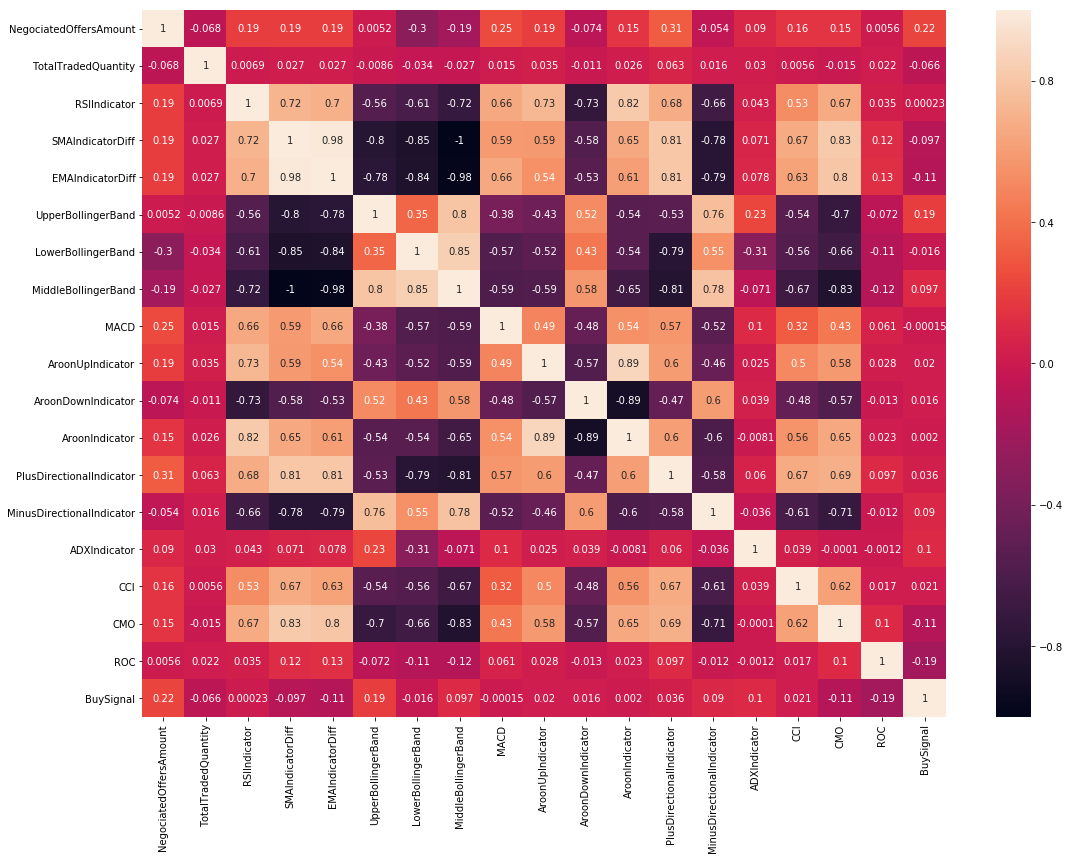

In [ ]:
temp = data_frame

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
y_train = data_frame["BuySignal"]
x_train = data_frame.drop(["BuySignal", "Start", "End"], axis=1)
#x_train = x_train.drop(["LowerBollingerBand", "AroonUpIndicator", "AroonDownIndicator", "AroonIndicator"], axis=1)
#x_train = data_frame.drop(["BuySignal", "Start", "End", "NormalizedClosePrice", "NormalizedOpenPrice", "NormalizedMediumPrice","NormalizedFirstTradePrice", "NormalizedMaxBuyOffer", "NormalizedMinSellOffer" ], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,182,188600,0.280000,-0.022143,0.007360,0.096223,-0.051938,0.022143,0.008852,14.285714,100.000000,-85.714286,13.408343,22.869885,0.000000,-39.853716,-63.265306,0.000000
1,167,167800,0.400000,-0.027857,-0.002288,0.099402,-0.043688,0.027857,0.007767,7.142857,92.857143,-85.714286,14.243299,20.264693,0.000000,-2.218607,-76.470588,0.052659
2,146,96900,0.344828,-0.051429,-0.027983,0.114605,-0.011747,0.051429,0.004434,7.142857,85.714286,-78.571429,12.606493,22.761018,22.156249,-24.120064,-97.297297,-0.052687
3,313,421600,0.333333,-0.024286,-0.006918,0.086409,-0.037838,0.024286,0.003368,7.142857,78.571429,-71.428571,19.938458,19.115173,17.670750,-37.815044,-73.913043,-0.052632
4,194,163300,0.387097,0.020714,0.028671,0.036645,-0.078074,-0.020714,0.005686,7.142857,71.428571,-64.285714,17.433561,16.713706,17.796176,-13.836436,70.731707,0.000000


In [ ]:
#x_train["NegociatedOffersAmount"].apply(np.log)
#x_train["TotalTradedQuantity"].apply(np.log)
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,5.204007,12.147384,0.280000,-0.022143,0.007360,0.096223,-0.051938,0.022143,0.008852,14.285714,100.000000,-85.714286,13.408343,22.869885,0.000000,-39.853716,-63.265306,0.000000
1,5.117994,12.030528,0.400000,-0.027857,-0.002288,0.099402,-0.043688,0.027857,0.007767,7.142857,92.857143,-85.714286,14.243299,20.264693,0.000000,-2.218607,-76.470588,0.052659
2,4.983607,11.481435,0.344828,-0.051429,-0.027983,0.114605,-0.011747,0.051429,0.004434,7.142857,85.714286,-78.571429,12.606493,22.761018,22.156249,-24.120064,-97.297297,-0.052687
3,5.746203,12.951812,0.333333,-0.024286,-0.006918,0.086409,-0.037838,0.024286,0.003368,7.142857,78.571429,-71.428571,19.938458,19.115173,17.670750,-37.815044,-73.913043,-0.052632
4,5.267858,12.003344,0.387097,0.020714,0.028671,0.036645,-0.078074,-0.020714,0.005686,7.142857,71.428571,-64.285714,17.433561,16.713706,17.796176,-13.836436,70.731707,0.000000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,0.626536,0.419197,0.196923,0.361963,0.421810,0.379048,0.777272,0.638037,0.397614,0.076923,1.000000,0.038462,0.159914,0.424919,0.000000,0.334387,0.183673,0.241607
1,0.614589,0.410678,0.330769,0.352147,0.400374,0.384638,0.787693,0.647853,0.393834,0.000000,0.923077,0.038462,0.171611,0.374315,0.000000,0.454191,0.117647,0.325918
2,0.595924,0.370651,0.269231,0.311656,0.343284,0.411373,0.828044,0.688344,0.382235,0.000000,0.846154,0.076923,0.148681,0.422804,0.209279,0.384472,0.013514,0.157253
3,0.701845,0.477838,0.256410,0.358282,0.390085,0.361789,0.795084,0.641718,0.378525,0.000000,0.769231,0.115385,0.251393,0.351986,0.166911,0.340877,0.130435,0.157341
4,0.635405,0.408697,0.316377,0.435583,0.469158,0.274275,0.744254,0.564417,0.386591,0.000000,0.692308,0.153846,0.216303,0.305339,0.168096,0.417208,0.853659,0.241607


Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

average_data_per_day = 120
max_days_interval = 20
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            new_mlp.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_mlp.predict(x_train[middle_range:max_range])
            
            print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(y_train[middle_range:max_range], y_predict))
            mlp_recall_arr.append(recall_score(y_train[middle_range:max_range], y_predict))
            
            acc_mlp_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            mlp_score_arr.append(mlp_score)

            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_logreg.predict(x_train[middle_range:max_range])
                  
            print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(y_train[middle_range:max_range], y_predict))
            logreg_recall_arr.append(recall_score(y_train[middle_range:max_range], y_predict))
            
            acc_logreg_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_logreg_score_arr.append(acc_mlp_score)
            logreg_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            logreg_score_arr.append(logreg_score)
        
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))

Days used to train: 1
Days to be predicted: 1
MLP (tn, fp, fn, tp): [35 19 18 48]
LogReg (tn, fp, fn, tp): [41 13 23 43]
MLP (tn, fp, fn, tp): [38 10 40 32]
LogReg (tn, fp, fn, tp): [37 11 36 36]
MLP (tn, fp, fn, tp): [16 33 11 60]
LogReg (tn, fp, fn, tp): [16 33  7 64]
MLP (tn, fp, fn, tp): [17 27 22 54]
LogReg (tn, fp, fn, tp): [12 32 19 57]
MLP (tn, fp, fn, tp): [22 28 24 46]
LogReg (tn, fp, fn, tp): [12 38 16 54]
MLP (tn, fp, fn, tp): [29 35 28 28]
LogReg (tn, fp, fn, tp): [26 38 23 33]
MLP (tn, fp, fn, tp): [36 22 31 31]
LogReg (tn, fp, fn, tp): [37 21 31 31]
MLP (tn, fp, fn, tp): [30 14 28 48]
LogReg (tn, fp, fn, tp): [18 26 16 60]
MLP (tn, fp, fn, tp): [30 16 32 42]
LogReg (tn, fp, fn, tp): [36 10 37 37]
MLP (tn, fp, fn, tp): [15 38 23 44]
LogReg (tn, fp, fn, tp): [10 43 13 54]
MLP (tn, fp, fn, tp): [34 13 35 38]
LogReg (tn, fp, fn, tp): [35 12 32 41]
MLP (tn, fp, fn, tp): [34 15 35 36]
LogReg (tn, fp, fn, tp): [32 17 41 30]
MLP (tn, fp, fn, tp): [16 43 16 45]
LogReg (tn, fp, fn

MLP (tn, fp, fn, tp): [31 33 10 46]
LogReg (tn, fp, fn, tp): [32 32 10 46]
MLP (tn, fp, fn, tp): [28 30 13 49]
LogReg (tn, fp, fn, tp): [26 32 11 51]
MLP (tn, fp, fn, tp): [14 30  4 72]
LogReg (tn, fp, fn, tp): [14 30  5 71]
MLP (tn, fp, fn, tp): [33 13 23 51]
LogReg (tn, fp, fn, tp): [33 13 24 50]
MLP (tn, fp, fn, tp): [21 32 16 51]
LogReg (tn, fp, fn, tp): [21 32 15 52]
MLP (tn, fp, fn, tp): [26 21 23 50]
LogReg (tn, fp, fn, tp): [32 15 27 46]
MLP (tn, fp, fn, tp): [37 12 32 39]
LogReg (tn, fp, fn, tp): [32 17 27 44]
MLP (tn, fp, fn, tp): [29 30 12 49]
LogReg (tn, fp, fn, tp): [28 31  9 52]
MLP (tn, fp, fn, tp): [32 21 23 44]
LogReg (tn, fp, fn, tp): [22 31 15 52]
MLP (tn, fp, fn, tp): [24 34 12 50]
LogReg (tn, fp, fn, tp): [23 35  8 54]
MLP (tn, fp, fn, tp): [22 12 18 68]
LogReg (tn, fp, fn, tp): [20 14 10 76]
MLP (tn, fp, fn, tp): [20 16 20 64]
LogReg (tn, fp, fn, tp): [21 15 15 69]
MLP (tn, fp, fn, tp): [ 7 32  5 76]
LogReg (tn, fp, fn, tp): [ 4 35  4 77]
MLP (tn, fp, fn, tp): [ 7

MLP (tn, fp, fn, tp): [23 13 16 68]
LogReg (tn, fp, fn, tp): [25 11 17 67]
MLP (tn, fp, fn, tp): [ 7 32  9 72]
LogReg (tn, fp, fn, tp): [ 7 32  9 72]
MLP (tn, fp, fn, tp): [ 7  5  6 13]
LogReg (tn, fp, fn, tp): [ 7  5  6 13]
MLP Average Accuracy Score: 0.6785618279569892
MLP Average Balanced Accuracy Score: 0.6507072616295719
MLP Average Precision Score: 0.7225041854882462
MLP Average Recall Score: 0.7600272097713066
LogReg Average Accuracy Score: 0.6785618279569892
LogReg Average Balanced Accuracy Score: 0.6651904094163963
LogReg Average Precision Score: 0.7261684518013631
LogReg Average Recall Score: 0.8051818338535437
Days used to train: 13
Days to be predicted: 1
MLP (tn, fp, fn, tp): [37 22 15 46]
LogReg (tn, fp, fn, tp): [35 24 13 48]
MLP (tn, fp, fn, tp): [29 24 20 47]
LogReg (tn, fp, fn, tp): [29 24 13 54]
MLP (tn, fp, fn, tp): [33 25 11 51]
LogReg (tn, fp, fn, tp): [32 26 10 52]
MLP (tn, fp, fn, tp): [20 14 18 68]
LogReg (tn, fp, fn, tp): [19 15 13 73]
MLP (tn, fp, fn, tp): [2

In [ ]:
data_frame.to_csv('all-data-ever.csv')

In [ ]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)


select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]

mlp = MLPClassifier(hidden_layer_sizes=[100])
scores = cross_val_score(mlp, X_train_selected, y_train, scoring = 'balanced_accuracy')

scores

In [ ]:
columns_with_support

In [ ]:
columns_without_support = columns[np.invert(support)]
columns_without_support

In [ ]:
log_reg = LogisticRegression(C=1000)

print(cross_val_score(log_reg, X_train_selected, y_train, scoring = 'balanced_accuracy'))

In [ ]:
print ('Univariate Statistics: Columns selected')
print(columns_with_support)
print ('Univariate Statistics: Columns without support')
print(columns_without_support)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]
columns_without_support = columns[np.invert(support)]

In [ ]:
print ('Model-Based Feature Selection: Columns selected')
print(columns_with_support)
print ('Model-Based Feature Selection: Columns without support')
print(columns_without_support)